HELLO EVERYONE!!


Here is my first try on VS code with my experience in Data Science
It maybe less but must be better

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Get the datas

In [256]:
#sns.get_dataset_names() #if you want to know what we can get

In [257]:
df = sns.load_dataset('titanic')

Clean useless data for an accurate output
This step might take 50% of your time

First, find data missing and how to fix them

In [258]:
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [259]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Then, fix it

In [260]:
# df['age'] = df['age'].fillna(df['age'].mean())    # แทนที่ Nan ใน age ด้วย Mean
#df.dropna(subset = ['age'], inplace = True)         # Delete Nan Row
#df.dtypes  #check type of Variable

In [261]:
df2 = df.drop(['parch','sibsp','embarked','adult_male','deck','embark_town','alone'], axis = 1) # Del no need row
df2['survived'] = df2.astype('category') # change from Int64 into Category type
df2['pclass'] = df2.astype('object') # change from Int64 into Object type
print(df2.head())
print(set(df['sex'])) # show option in 'sex'
print(df[df['sex'] == 'male'][:2]) # show all data if 'sex = male
print(df[df['sex'] == 'male']['class'][:3]) # show class if 'sex' = male
print(df[(df['sex'] == 'male') & (df['alive'] == 'yes')][:2])

  survived pclass     sex   age     fare  class    who alive
0        0      0    male  22.0   7.2500  Third    man    no
1        1      1  female  38.0  71.2833  First  woman   yes
2        1      1  female  26.0   7.9250  Third  woman   yes
3        1      1  female  35.0  53.1000  First  woman   yes
4        0      0    male  35.0   8.0500  Third    man    no
{'female', 'male'}
   survived  pclass   sex   age  sibsp  parch  fare embarked  class  who  \
0         0       3  male  22.0      1      0  7.25        S  Third  man   
4         0       3  male  35.0      0      0  8.05        S  Third  man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
4        True  NaN  Southampton    no   True  
0    Third
4    Third
5    Third
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']
    survived  pclass   sex   age  sibsp  parch  fare embarked   class  who  \
17         1       2  male   NaN      0      0  13.0

In [262]:
print(df.columns)
dfc = df.rename(columns = {'pclass':'class num'}) # change column name
print(dfc.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
Index(['survived', 'class num', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


Use pivot table to show main target information

In [263]:
pvt = df2.pivot_table(index=['who'], columns=['alive'], values=['class'], aggfunc=['count'], margins=True)
#pvt = df2.pivot_table(index=['who'], columns=['alive'], values=['class'], aggfunc=['count'])
pvt

count          
      class          
alive    no  yes  All
who                  
child    34   49   83
man     449   88  537
woman    66  205  271
All     549  342  891

<AxesSubplot:xlabel='who'>

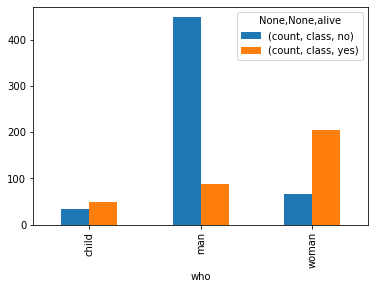

In [264]:
pvt2 = df2.pivot_table(index=['who'], columns=['alive'], values=['class'], aggfunc=['count'])
pvt2.plot.bar()

In [265]:
pvt3 = df2.pivot_table(index=['alive'],columns=['class'],values=['fare'],aggfunc='sum')
pvt3

fare                      
class       First     Second      Third
alive                                  
no      5174.7206  1882.9958  5085.0035
yes    13002.6919  1918.8459  1629.6916

In [266]:
dfdc = df.drop(['parch','embarked','adult_male','deck','embark_town','alone','who','pclass','survived'], axis = 1) 
#print(dfdc.dtypes)
#print(dfdc.isnull().any())
dfdc['age'] = pd.to_numeric(df['age'],errors='coerce') # Change -- * / + into missing data ('Nan) 
dfdc['age'] = dfdc['age'].fillna(dfdc['age'].mean())
# dfdc['age'] = dfdc.astype('int64')
dfdc['age'].isnull().any()
dfdc[dfdc['age'].isnull()]
#print(dfdc.dtypes,'\n')
print('The sex of Passenger is','\n',dfdc.groupby('sex')['sex'].count())
print(dfdc.pivot_table(index=['sex'], aggfunc=['count']),'\n')
print('',dfdc.groupby('alive')['sex'].count())
print(dfdc.pivot_table(index=['alive'],columns=['sex'],values=['class'], aggfunc=['count'],margins='True'))

The sex of Passenger is 
 sex
female    314
male      577
Name: sex, dtype: int64
       count                       
         age alive class fare sibsp
sex                                
female   314   314   314  314   314
male     577   577   577  577   577 

 alive
no     549
yes    342
Name: sex, dtype: int64
       count          
       class          
sex   female male  All
alive                 
no        81  468  549
yes      233  109  342
All      314  577  891


Start DECISION TREE!!

In [267]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=3)


In [268]:
dfdc.dtypes  # Object or string can't fit the model. needed transform into number

sex        object
age       float64
sibsp       int64
fare      float64
class    category
alive      object
dtype: object

In [269]:
from sklearn.preprocessing import LabelEncoder

def labelEncode(data, columns):
    for i in columns:
        lb = LabelEncoder().fit_transform(data[i])
        data[i + '_'] = lb

labelEncode(dfdc,['sex','class'])

y_le = LabelEncoder()
y = y_le.fit_transform(dfdc['alive'])

dfdc['alive_'] = y

In [270]:
dfdc

,sex,age,sibsp,fare,class,alive,sex_,class_,alive_
0,male,22.000000,1,7.2500,Third,no,1,2,0
1,female,38.000000,1,71.2833,First,yes,0,0,1
2,female,26.000000,0,7.9250,Third,yes,0,2,1
3,female,35.000000,1,53.1000,First,yes,0,0,1
4,male,35.000000,0,8.0500,Third,no,1,2,0
...,...,...,...,...,...,...,...,...,...
886,male,27.000000,0,13.0000,Second,no,1,1,0
887,female,19.000000,0,30.0000,First,yes,0,0,1
888,female,29.699118,1,23.4500,Third,no,0,2,0
889,male,26.000000,0,30.0000,First,yes,1,0,1


In [271]:
X = dfdc[['age','sibsp','fare','sex_','class_']]   # feature
y = dfdc['alive_']   # target
X[:3]

,age,sibsp,fare,sex_,class_
0,22.0,1,7.2500,1,2
1,38.0,1,71.2833,0,0
2,26.0,0,7.9250,0,2


In [272]:
model_DT.fit(X,y) 

DecisionTreeClassifier(max_depth=3)

WE GOT THE MODEL !!

now let's test it by creat new data

In [273]:
data = [[55,3,7.90,0,2]] # age = 55 sibsp = 3 fare = 7.9000 sex = female class = Third
y_predict = model_DT.predict(data)
y_predict  # 0  = no alive


array([1])

In [274]:
print(dfdc[:1])

    sex   age  sibsp  fare  class alive  sex_  class_  alive_
0  male  22.0      1  7.25  Third    no     1       2       0


This will spilt your Data into Feature and Target 

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)  # 20% for test , 80% for train

In [276]:
print('Total X :{}',format(len(X)))
print('Total train: {}',format(len(X_train)))
print('Total test: {}',format(len(X_test)))
X_test[:5]

Total X :{} 891
Total train: {} 712
Total test: {} 179


,age,sibsp,fare,sex_,class_
796,49.0,0,25.9292,0,0
194,44.0,0,27.7208,0,0
569,32.0,0,7.8542,1,2
807,18.0,0,7.7750,0,2
22,15.0,0,8.0292,0,2


In [277]:
model_DT.fit(X_train, y_train)
y_predict_DT = model_DT.predict(X_test)
y_predict_DT[:5]

array([1, 1, 0, 1, 1])

In [278]:
y_test[:5]

796    1
194    1
569    1
807    0
22     1
Name: alive_, dtype: int32

In [279]:
print('Accuracy %: {}'.format(accuracy_score(y_test, y_predict_DT)*100))   # score is a bit low
print('Score -> {:.4f}'.format(model_DT.score(X_test,y_test)))

Accuracy %: 78.77094972067039
Score -> 0.7877


In [280]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test,y_predict_DT)

print(classification_report(y_test,y_predict_DT, target_names=['No','Yes']))
print(cm)

              precision    recall  f1-score   support

          No       0.79      0.86      0.82       103
         Yes       0.79      0.68      0.73        76

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

[[89 14]
 [24 52]]


Start Random Forest

In [294]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=90) # n is quatity of the tree

model_RF.fit(X_train,y_train)
y_predict_RF = model_RF.predict(X_test)
y_predict_RF[:5]

array([1, 1, 0, 1, 1])

In [295]:
print('Accuracy %: {}'.format(accuracy_score(y_test, y_predict_RF)*100))   # score is a bit low
print('Score -> {:.4f}'.format(model_RF.score(X_test,y_test)))

Accuracy %: 81.56424581005587
Score -> 0.8156


Start K-Mean

In [305]:
from sklearn.cluster import KMeans
model_KM = KMeans(n_clusters=2)   # n = quatity of cluster
y_KM = model_KM.fit_predict(X)

dfdc_KM = dfdc
dfdc_KM['cluster'] = y_KM   # set new column named 'cluster'
dfdc_KM

,sex,age,sibsp,fare,class,alive,sex_,class_,alive_,cluster
0,male,22.000000,1,7.2500,Third,no,1,2,0,0
1,female,38.000000,1,71.2833,First,yes,0,0,1,0
2,female,26.000000,0,7.9250,Third,yes,0,2,1,0
3,female,35.000000,1,53.1000,First,yes,0,0,1,0
4,male,35.000000,0,8.0500,Third,no,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.000000,0,13.0000,Second,no,1,1,0,0
887,female,19.000000,0,30.0000,First,yes,0,0,1,0
888,female,29.699118,1,23.4500,Third,no,0,2,0,0
889,male,26.000000,0,30.0000,First,yes,1,0,1,0


In [306]:
df[dfdc_KM['cluster']==0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
